# Loading all Required packages

In [12]:
import pycoingecko as pycoin
import pandas as pd
import numpy as np
from rich.console import Console
from rich.table import Table
import matplotlib.pyplot as plt
import datetime

# Building all functions

In [16]:
def get_token_list(cg):
    return_data = cg.get_coins_list()
    return_data = pd.DataFrame(return_data)
    return return_data

In [14]:
def testing_coin_connection(cg):
    test_con_value = cg.ping()
    if test_con_value == {'gecko_says': '(V3) To the Moon!'}:
        return 'Connection is good'
    else:
        return ['Connection not good',test_con_value]

In [17]:
def pull_in_top_5_data(cg,cryp_list):
    data_pull = cg.get_price(ids =cryp_list,vs_currencies = 'usd')
    data_pull_DF =pd.DataFrame.from_dict(data_pull,orient='index')
    data_pull_DF.index.name = 'coin_name'
    data_pull_DF.reset_index(inplace=True)
    data_pull_DF = data_pull_DF.sort_values(by=['usd'],ascending=False)
    return data_pull_DF

In [18]:
def make_top_5_table(cg,cryp_list):
    data_pull_DF = pull_in_top_5_data(cg,cryp_list)
    
    table = Table(title="Top 5 Coins")
    table.add_column("Coin",justify="right",style="cyan")
    table.add_column("Price",justify="right",style="green")
    
    table.add_row(str(data_pull_DF.iloc[0]["coin_name"]),str(data_pull_DF.iloc[0]["usd"]))
    table.add_row(str(data_pull_DF.iloc[1]["coin_name"]),str(data_pull_DF.iloc[1]["usd"]))
    table.add_row(str(data_pull_DF.iloc[2]["coin_name"]),str(data_pull_DF.iloc[2]["usd"]))
    table.add_row(str(data_pull_DF.iloc[3]["coin_name"]),str(data_pull_DF.iloc[3]["usd"]))
    table.add_row(str(data_pull_DF.iloc[4]["coin_name"]),str(data_pull_DF.iloc[4]["usd"]))
    console = Console()
    console.print(table)

In [37]:
def top_7_table(cg):
    raw_data = cg.get_search_trending()
    bt_price = cg.get_price('bitcoin',vs_currencies = 'usd')
    bt_price = ((pd.json_normalize(bt_price)))
    #top_7_data_DF =pd.DataFrame.from_dict(raw_data['coins'],orient='index')
    top_7_data_DF = (pd.json_normalize(raw_data,record_path = ['coins']))
    top_7_data_DF['US_Value'] = top_7_data_DF['item.price_btc']/int(bt_price['bitcoin.usd'])

    table = Table(title="Top 7 Searched Coins on CoinGecko")
    table.add_column("Rank",justify="center",style="white")
    table.add_column("Coin Name",justify="center",style="cyan")
    table.add_column("Coin ID",justify="center",style="white")
    table.add_column("Coin Symbol",justify="center",style="white")
    table.add_column("Market Cap",justify="center",style="white")
    table.add_column("Price BTC",justify="center",style="green")
    table.add_column("Price USD",justify="center",style="green")

    for i in top_7_data_DF.index:
        table.add_row(str(top_7_data_DF.iloc[i]["item.score"]+1),
                    str(top_7_data_DF.iloc[i]["item.name"]),
                    str(top_7_data_DF.iloc[i]["item.id"]),
                    str(top_7_data_DF.iloc[i]["item.symbol"]),
                    str(top_7_data_DF.iloc[i]["item.market_cap_rank"]),
                    str(top_7_data_DF.iloc[i]["item.price_btc"]),
                    "$" + str(top_7_data_DF.iloc[i]["US_Value"]))

    console = Console()
    console.print(table)


In [20]:
def Chart_Analysis(api_key,days_back,Coin,info):
    if info == [] or type(info) != list:
        raise ValueError('Check if info list is populated.')
    info_set = ['Price','Total Volumes','Market Cap']
    if not(set(info).issubset(info_set)):
        raise ValueError('Check all items in info variable.')
    
    raw_data = api_key.get_coin_market_chart_by_id(id = Coin,vs_currency= 'usd',days = days_back)
    
    fig, axs = plt.subplots(1,len(info),squeeze=False)
    for plot in range(len(info)):
        if info[plot] == 'Price':
            price_data = pd.json_normalize(raw_data,record_path = 'prices')
            price_data['clean_time'] = pd.to_datetime(price_data[0],unit = 'ms')
            price_data['clean_time'] = pd.to_datetime(price_data['clean_time'],format = '%Y-%m-%d')
            price_data['price'] = price_data[1]
            axs[0,plot].plot(price_data['clean_time'],price_data['price'])
            axs[0,plot].set_title(f'{Coin.capitalize()} Price Vs Time')
            axs[0,plot].tick_params(labelrotation=45)
            axs[0,plot].yaxis.set_major_formatter('${x:,.0f}')
        elif info[plot] == 'Market Cap':
            MC_data = pd.json_normalize(raw_data,record_path = 'market_caps')
            MC_data['clean_time'] = (pd.to_datetime(MC_data[0],unit = 'ms'))
            MC_data['Market_Cap'] = MC_data[1]
            axs[0,plot].plot(MC_data['clean_time'],MC_data['Market_Cap'])
            axs[0,plot].set_title(f'{Coin.capitalize()} Market Cap Vs Time')
            axs[0,plot].tick_params(labelrotation=45)
        elif info[plot] == 'Total Volumes':
            TV_data = pd.json_normalize(raw_data,record_path = 'total_volumes')
            TV_data['clean_time'] = (pd.to_datetime(TV_data[0],unit = 'ms'))
            TV_data['total_volumes'] = TV_data[1]
            axs[0,plot].plot(TV_data['clean_time'],TV_data['total_volumes'])
            axs[0,plot].set_title(f'{Coin.capitalize()} Total Volumes VS Time')
            axs[0,plot].tick_params(labelrotation=45)
    plt.show()


# Getting all Coin Listed on CoinGecko

In [48]:
get_token_list(cg)


,id,symbol,name
0,,aapt,AAptitude
1,01coin,zoc,01coin
2,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
3,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
4,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token
...,...,...,...
13115,zyro,zyro,Zyro
13116,zyrri,zyr,Zyrri
13117,zytara-dollar,zusd,Zytara Dollar
13118,zyx,zyx,ZYX


# Return Bsic Information as a Dataframe

In [40]:
cg = pycoin.CoinGeckoAPI()
pull_in_top_5_data(cg,['bitcoin', 'tether', 'ethereum','solana','binance coin'])

,coin_name,usd
1,bitcoin,39167.000
2,ethereum,2586.760
0,binancecoin,375.440
3,solana,82.280
4,tether,1.001


# Basic Information about 5 Coins form CoinGecko as a Table

In [41]:
make_top_5_table(cg,['bitcoin', 'tether', 'ethereum','solana','binance coin'])

       Top 5 Coins       
┏━━━━━━━━━━━━━┳━━━━━━━━━┓
┃        Coin ┃   Price ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━┩
│     bitcoin │ 39167.0 │
│    ethereum │ 2586.76 │
│ binancecoin │  375.44 │
│      solana │   82.28 │
│      tether │   1.001 │
└─────────────┴─────────┘

# The Top 7 Coins being searched for on CoinGecko

In [42]:
top_7_table(cg)

                              Top 7 Searched Coins on CoinGecko                              
┏━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Rank ┃  Coin Name  ┃   Coin ID    ┃ Coin Symbol ┃ Market Cap ┃  Price BTC   ┃  Price USD  ┃
┡━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│  1   │ Metis Token │ metis-token  │    METIS    │    153     │ 0.003926956… │ $1.0024907… │
│  2   │    STEPN    │    stepn     │     GMT     │    265     │ 7.949859306… │ $2.0294749… │
│  3   │   Fantom    │    fantom    │     FTM     │     44     │ 3.037532919… │ $7.7543472… │
│  4   │    JUNO     │ juno-network │    JUNO     │     68     │ 0.000898961… │ $2.2949081… │
│  5   │    Gala     │     gala     │    GALA     │     63     │ 6.050768144… │ $1.5446666… │
│  6   │    Terra    │  terra-luna  │    LUNA     │     7      │ 0.002228503… │ $5.6890227… │
│  7   │     BNB     │ binancecoin  │     BNB     │     4      │ 0.009586355… │ $2.4472469… │
└──────┴─────────────┴──────────────┴─────────────┴────────────┴──────────────┴─────────────┘

# Bitcoin Price and Total Volumn Vs Time

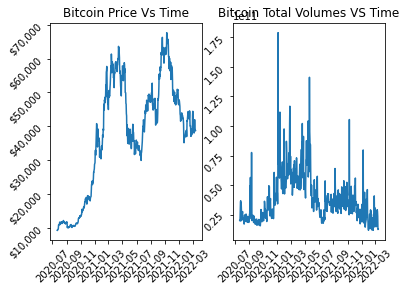

In [51]:
cg = pycoin.CoinGeckoAPI()
Chart_Analysis(cg,600,'bitcoin',['Price','Total Volumes'])

# Bitcoin Price, Total Volume and Market Cap Vs Time

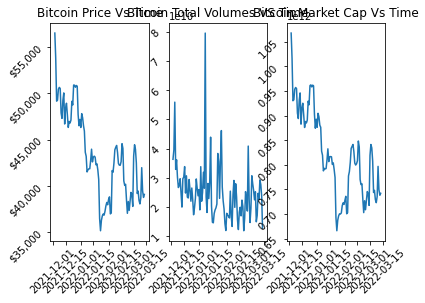

In [26]:
Chart_Analysis(cg,100,'bitcoin',['Price','Total Volumes','Market Cap'])

## Bitcoin Market Cap Vs Time

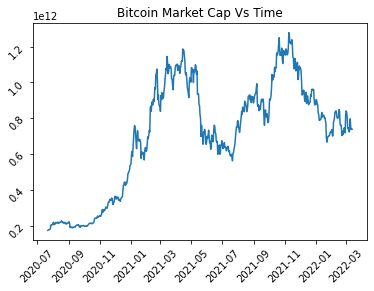

In [50]:
Chart_Analysis(cg,600,'bitcoin',['Market Cap'])